<a href="https://colab.research.google.com/github/chhamman0210/chhamman0210/blob/master/LSTM%2BCNN%2BATTENSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Preparation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load combined dataset
# Load your data
file_path = "/content/drive/MyDrive/Research/GCM DATASET/DELHI_GCM_IMD_1976_2016.csv"  # Update with your file's path in Colab
data = pd.read_csv(file_path)


# Convert AW (IMD wind speed) to m/s
data['AW_mps'] = data['AW'] * 0.27778

# Compute wind magnitude and direction
data['wind_magnitude'] = np.sqrt(data['u10']**2 + data['v10']**2)
data['wind_direction'] = np.arctan2(data['v10'], data['u10'])

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Normalize predictors
scaler = MinMaxScaler()
predictors = ['u10', 'v10', 't2m', 'sp', 'd2m', 'tp', 'wind_magnitude', 'wind_direction']
data[predictors] = scaler.fit_transform(data[predictors])

# Display the first few rows
print(data.head())


    tp       u10       v10       d2m       t2m        sp  AW   AW_mps  \
0  0.0  0.540871  0.354226  0.366572  0.180915  0.833477   2  0.55556   
1  0.0  0.508800  0.475570  0.385981  0.201104  0.759185   2  0.55556   
2  0.0  0.611042  0.346752  0.376988  0.171127  0.713731   4  1.11112   
3  0.0  0.655032  0.318925  0.324128  0.164180  0.770787   7  1.94446   
4  0.0  0.668394  0.360338  0.252609  0.174590  0.822425   7  1.94446   

   wind_magnitude  wind_direction  
0        0.151988        0.331880  
1        0.013328        0.488955  
2        0.248935        0.403710  
3        0.334661        0.413809  
4        0.336495        0.438290  


<ipython-input-4-082b9e60e90e>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Step 2: Split the Dataset
Split the dataset into training (70%), validation (15%), and testing (15%) sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Define predictors (X) and target (y)
X = data[['u10', 'v10', 't2m', 'sp', 'd2m', 'tp', 'wind_magnitude', 'wind_direction']]
y = data['AW_mps']  # Target: wind speed in m/s

# Split data into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the sizes of the splits
print(f"Training data: {X_train.shape}")
print(f"Validation data: {X_val.shape}")
print(f"Test data: {X_test.shape}")


Training data: (10483, 8)
Validation data: (2246, 8)
Test data: (2247, 8)


# Step 3: Build and Evaluate Baseline Models
We will implement:

Linear Regression (LR) as a simple benchmark.
Random Forest (RF) for non-linear relationships.
XGBoost for advanced tree-based modeling.


Training Linear Regression Model...

Linear Regression Test Metrics:
MSE: 0.7386
RMSE: 0.8594
MAE: 0.6282
R²: 0.4332
Pearson Correlation: 0.6595
Spearman Correlation: 0.6615

Training Random Forest Model...

Random Forest Test Metrics:
MSE: 0.7043
RMSE: 0.8392
MAE: 0.6149
R²: 0.4595
Pearson Correlation: 0.6819
Spearman Correlation: 0.6824

Training XGBoost Model...

XGBoost Test Metrics:
MSE: 0.7334
RMSE: 0.8564
MAE: 0.6227
R²: 0.4372
Pearson Correlation: 0.6713
Spearman Correlation: 0.6694


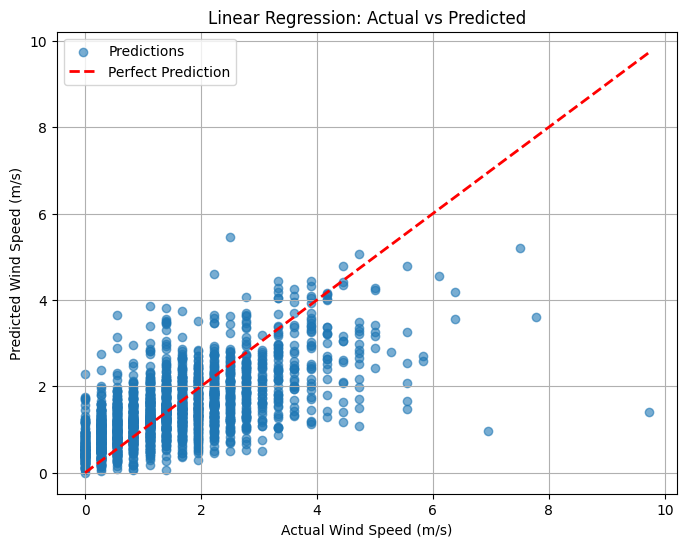

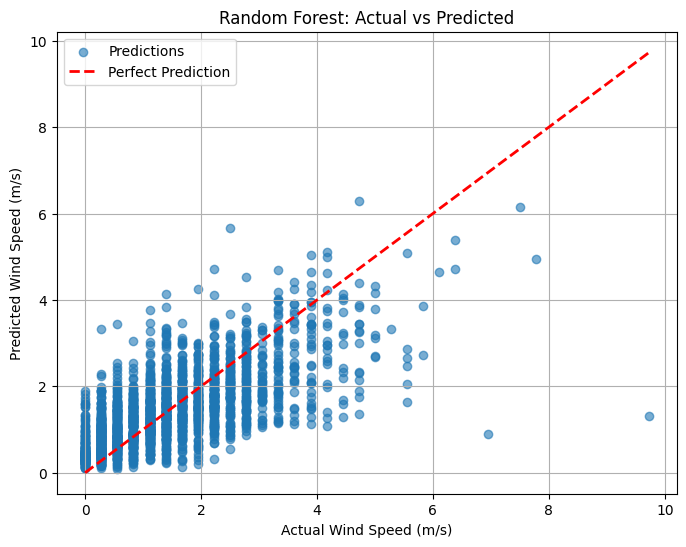

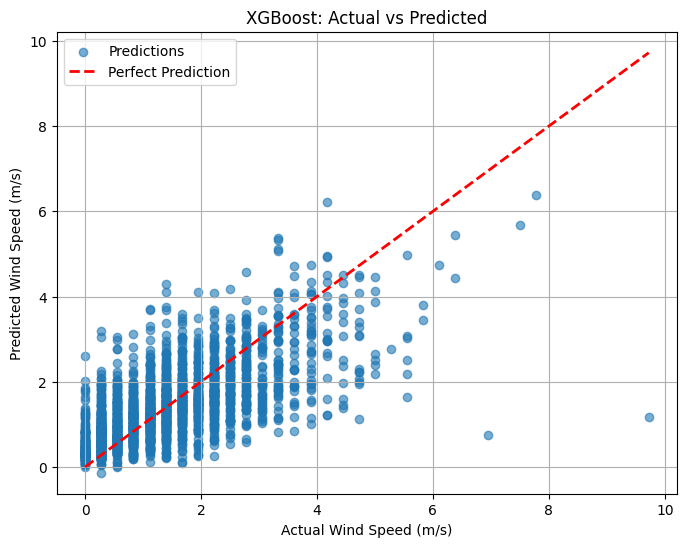

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr, spearmanr

# Function to calculate evaluation metrics including correlation
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true, y_pred)
    spearman_corr, _ = spearmanr(y_true, y_pred)
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr
    }

# Linear Regression Model
print("\nTraining Linear Regression Model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_test_pred_lr = lr_model.predict(X_test)
lr_metrics = evaluate_model(y_test, y_test_pred_lr)
print("\nLinear Regression Test Metrics:")
for key, value in lr_metrics.items():
    print(f"{key}: {value:.4f}")

# Random Forest Model
print("\nTraining Random Forest Model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_test_pred_rf = rf_model.predict(X_test)
rf_metrics = evaluate_model(y_test, y_test_pred_rf)
print("\nRandom Forest Test Metrics:")
for key, value in rf_metrics.items():
    print(f"{key}: {value:.4f}")

# XGBoost Model
print("\nTraining XGBoost Model...")
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_test_pred_xgb = xgb_model.predict(X_test)
xgb_metrics = evaluate_model(y_test, y_test_pred_xgb)
print("\nXGBoost Test Metrics:")
for key, value in xgb_metrics.items():
    print(f"{key}: {value:.4f}")

import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, label='Predictions')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Prediction')
    plt.title(title)
    plt.xlabel("Actual Wind Speed (m/s)")
    plt.ylabel("Predicted Wind Speed (m/s)")
    plt.legend()
    plt.grid()
    plt.show()

# Plot for each model
plot_actual_vs_predicted(y_test, y_test_pred_lr, "Linear Regression: Actual vs Predicted")
plot_actual_vs_predicted(y_test, y_test_pred_rf, "Random Forest: Actual vs Predicted")
plot_actual_vs_predicted(y_test, y_test_pred_xgb, "XGBoost: Actual vs Predicted")



# Step 4: Implement LSTM Model
Explanation:
LSTM is designed to handle sequential data and can effectively capture temporal dependencies.
We will reshape the dataset to include a time dimension and train the LSTM model.


Epoch 1/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 1.6872 - val_loss: 1.2686 - learning_rate: 0.0010
Epoch 2/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7624 - val_loss: 1.2723 - learning_rate: 0.0010
Epoch 3/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7436 - val_loss: 1.2620 - learning_rate: 0.0010
Epoch 4/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7121 - val_loss: 1.2740 - learning_rate: 0.0010
Epoch 5/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.7320 - val_loss: 1.2974 - learning_rate: 0.0010
Epoch 6/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7370 - val_loss: 1.2602 - learning_rate: 0.0010
Epoch 7/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7227 - val_loss: 1.2569 - learning_rate: 0.0010
Epoch 8/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7178 - val_loss: 1.2555 - learning_rate: 0.0010
Epoch 9/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7073 - val_loss: 1.2625 - learning_rate: 0.0010
Epoch 10/5

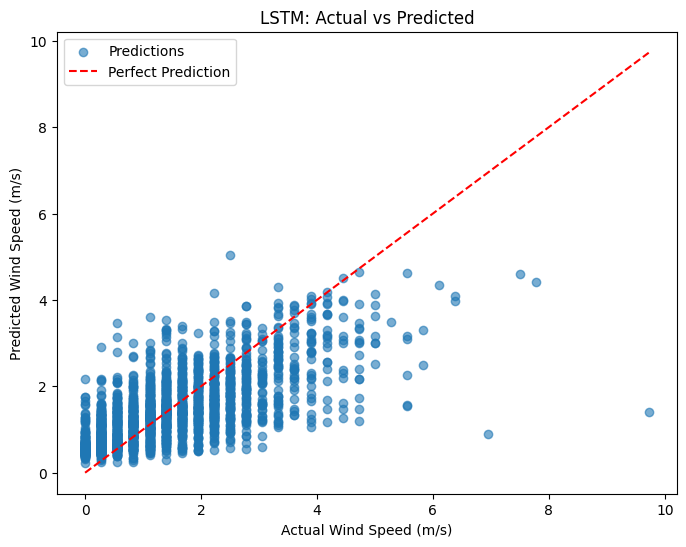

In [ ]:
# Importing Required Libraries for Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr, spearmanr
import numpy as np
import matplotlib.pyplot as plt

# Reshape Data for LSTM
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_val_lstm = np.expand_dims(X_val.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

# Define LSTM Model
def build_lstm():
    model = Sequential([
        Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        LSTM(64, return_sequences=False),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize and Train the LSTM Model
lstm_model = build_lstm()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate on Test Data
y_test_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Evaluation Metrics Function with Correlation
def evaluate_model_with_correlation(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true, y_pred)
    spearman_corr, _ = spearmanr(y_true, y_pred)
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr
    }

# Evaluate LSTM Model
lstm_metrics = evaluate_model_with_correlation(y_test, y_test_pred_lstm)
print("\nLSTM Test Metrics:")
for metric, value in lstm_metrics.items():
    print(f"{metric}: {value:.4f}")

# Scatter Plot for LSTM Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lstm, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Wind Speed (m/s)')
plt.ylabel('Predicted Wind Speed (m/s)')
plt.title('LSTM: Actual vs Predicted')
plt.legend()
plt.show()


Epoch 1/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.4617 - val_loss: 0.4241 - learning_rate: 0.0010
Epoch 2/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3045 - val_loss: 0.3277 - learning_rate: 0.0010
Epoch 3/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3122 - val_loss: 0.3041 - learning_rate: 0.0010
Epoch 4/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3034 - val_loss: 0.3063 - learning_rate: 0.0010
Epoch 5/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2941 - val_loss: 0.3022 - learning_rate: 0.0010
Epoch 6/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2985 - val_loss: 0.3072 - learning_rate: 0.0010
Epoch 7/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2944 - val_loss: 0.2978 - learning_rate: 0.0010
Epoch 8/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2819 - val_loss: 0.2948 - learning_rate: 0.0010
Epoch 9/100
328/328 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2916 - val_loss: 0.3009 - learning_rate: 0.0

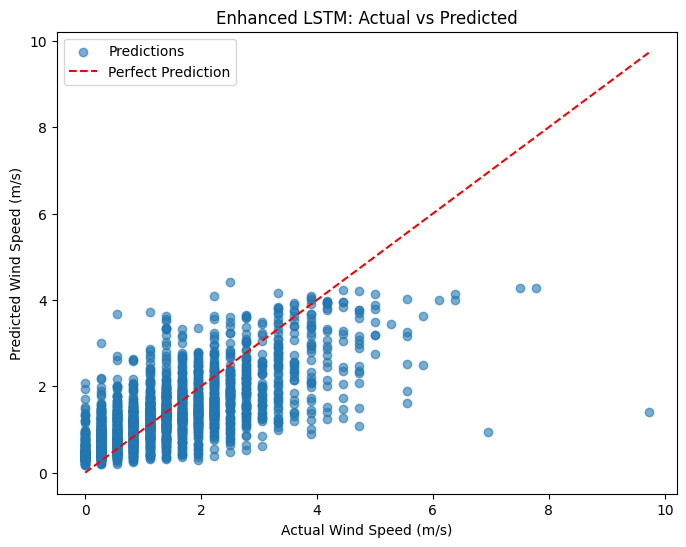

In [ ]:
# Importing Required Libraries for Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr, spearmanr
import numpy as np
import matplotlib.pyplot as plt

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape Data for LSTM
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)
X_val_lstm = np.expand_dims(X_val_scaled, axis=1)
X_test_lstm = np.expand_dims(X_test_scaled, axis=1)

# Define Enhanced LSTM Model
def build_enhanced_lstm():
    model = Sequential([
        Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Bidirectional(LSTM(128, return_sequences=True)),  # Bidirectional LSTM for better context
        Dropout(0.3),
        BatchNormalization(),
        LSTM(64, return_sequences=False),
        Dropout(0.3),
        Dense(32, activation='tanh'),  # Alternative activation function
        Dropout(0.2),
        Dense(1)  # Output layer for regression
    ])
    # Use tf.keras.losses.Huber() instead of 'huber_loss'
    model.compile(optimizer='adam', loss=tf.keras.losses.Huber())  # Huber loss for robust regression
    return model

# Initialize and Train the Enhanced LSTM Model
enhanced_lstm_model = build_enhanced_lstm()
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history_enhanced_lstm = enhanced_lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate on Test Data
y_test_pred_lstm = enhanced_lstm_model.predict(X_test_lstm).flatten()

# Evaluation Metrics Function with Correlation
def evaluate_model_with_correlation(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true, y_pred)
    spearman_corr, _ = spearmanr(y_true, y_pred)
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr
    }

# Evaluate Enhanced LSTM Model
enhanced_lstm_metrics = evaluate_model_with_correlation(y_test, y_test_pred_lstm)
print("\nEnhanced LSTM Test Metrics:")
for metric, value in enhanced_lstm_metrics.items():
    print(f"{metric}: {value:.4f}")

# Scatter Plot for LSTM Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lstm, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Wind Speed (m/s)')
plt.ylabel('Predicted Wind Speed (m/s)')
plt.title('Enhanced LSTM: Actual vs Predicted')
plt.legend()
plt.show()

# Implement LSTM+CNN Model:

Combine the temporal capabilities of LSTM with the spatial pattern extraction capabilities of CNN.

Epoch 1/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.9864 - val_loss: 1.8502 - learning_rate: 0.0010
Epoch 2/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7551 - val_loss: 1.2831 - learning_rate: 0.0010
Epoch 3/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.7107 - val_loss: 1.2400 - learning_rate: 0.0010
Epoch 4/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6939 - val_loss: 1.2223 - learning_rate: 0.0010
Epoch 5/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6812 - val_loss: 1.2238 - learning_rate: 0.0010
Epoch 6/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7208 - val_loss: 1.2377 - learning_rate: 0.0010
Epoch 7/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6696 - val_loss: 1.2194 - learning_rate: 0.0010
Epoch 8/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6863 - val_loss: 1.2405 - learning_rate: 0.0010
Epoch 9/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.6702 - val_loss: 1.2241 - learning_rate: 0.0010
Epoch 10/5

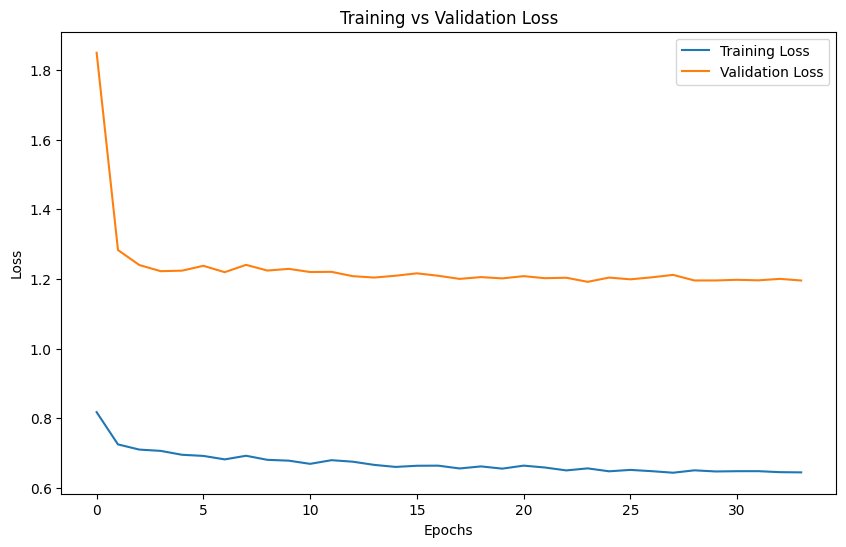

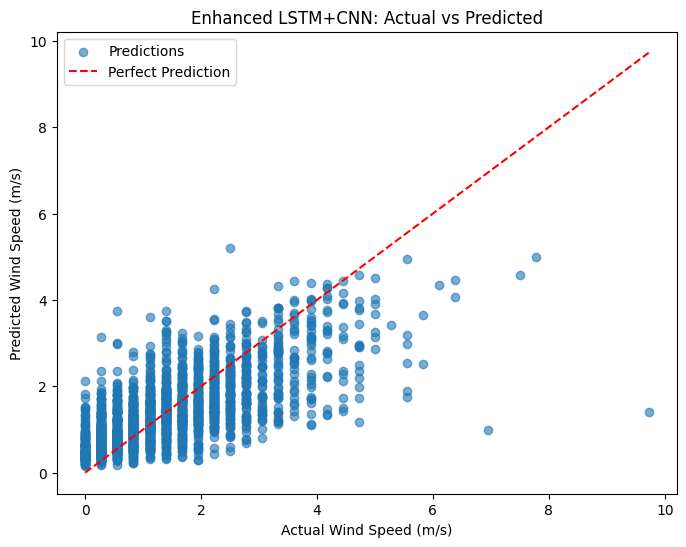

In [ ]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Conv1D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import numpy as np

# Define Enhanced LSTM+CNN Model
def build_lstm_cnn():
    model = Sequential([
        Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        LSTM(64, return_sequences=True),
        BatchNormalization(),
        Conv1D(filters=32, kernel_size=1, activation='relu'), # Change kernel_size to 1
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize and Train the Model
lstm_cnn_model = build_lstm_cnn()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history_lstm_cnn = lstm_cnn_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Evaluate the Model
y_test_pred_lstm_cnn = lstm_cnn_model.predict(X_test_lstm).flatten()

# Function to Calculate Metrics
def evaluate_model_with_correlation(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    pearson_corr, _ = pearsonr(y_true, y_pred)
    spearman_corr, _ = spearmanr(y_true, y_pred)
    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Pearson Correlation': pearson_corr,
        'Spearman Correlation': spearman_corr
    }

# Evaluate the Enhanced Model
lstm_cnn_metrics = evaluate_model_with_correlation(y_test, y_test_pred_lstm_cnn)
print("\nEnhanced LSTM+CNN Test Metrics:")
for metric, value in lstm_cnn_metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history_lstm_cnn.history['loss'], label='Training Loss')
plt.plot(history_lstm_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Scatter Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lstm_cnn, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Wind Speed (m/s)')
plt.ylabel('Predicted Wind Speed (m/s)')
plt.title('Enhanced LSTM+CNN: Actual vs Predicted')
plt.legend()
plt.show()


# LSTM+CNN+ATTENSION

Feature Engineering
Enhancing Dataset with Additional Features
We’ll include rolling averages and interaction terms for predictors like wind speed components.

In [ ]:
# Add rolling averages for temporal dependencies (window size: 3 days)
data['wind_speed_rolling_mean'] = data['AW_mps'].rolling(window=3).mean()
data['wind_speed_rolling_std'] = data['AW_mps'].rolling(window=3).std()

# Add interaction terms
data['u10_v10_interaction'] = data['u10'] * data['v10']

# Fill NaN values caused by rolling operations
data.fillna(method='bfill', inplace=True)

# Normalize the enhanced dataset
enhanced_predictors = ['u10', 'v10', 't2m', 'sp', 'd2m', 'tp',
                       'wind_magnitude', 'wind_direction',
                       'wind_speed_rolling_mean', 'wind_speed_rolling_std',
                       'u10_v10_interaction']
data[enhanced_predictors] = scaler.fit_transform(data[enhanced_predictors])


<ipython-input-10-3fe869ff7d13>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


Train-Test Split with Enhanced Data
We’ll use the enhanced predictors for training.

In [ ]:
# Define enhanced predictors (X) and target (y)
X_enhanced = data[enhanced_predictors]
y = data['AW_mps']

# Split into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X_enhanced, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape for LSTM-based models
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_val_lstm = np.expand_dims(X_val.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)


Enhanced LSTM+CNN Model with Attention
We’ll build an improved LSTM+CNN model with an attention layer to focus on important features.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


320/328 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9685

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


328/328 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9589 - val_loss: 1.6027 - learning_rate: 0.0010
Epoch 2/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4287 - val_loss: 1.1557 - learning_rate: 0.0010
Epoch 3/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4291 - val_loss: 0.9022 - learning_rate: 0.0010
Epoch 4/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4070 - val_loss: 0.8946 - learning_rate: 0.0010
Epoch 5/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3964 - val_loss: 0.9625 - learning_rate: 0.0010
Epoch 6/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3799 - val_loss: 0.9197 - learning_rate: 0.0010
Epoch 7/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3965 - val_loss: 0.9695 - learning_rate: 0.0010
Epoch 8/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3661 - val_loss: 0.8446 - learning_rate: 0.0010
Epoch 9/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3705 - val_loss: 0.8867 - learning_rate: 0.0010
Epoch 10/50
328/328 ━

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Enhanced LSTM+CNN+Attention Test Metrics:
MSE: 0.3640
RMSE: 0.6033
MAE: 0.4240
R²: 0.7206
Pearson Correlation: 0.8501
Spearman Correlation: 0.8540


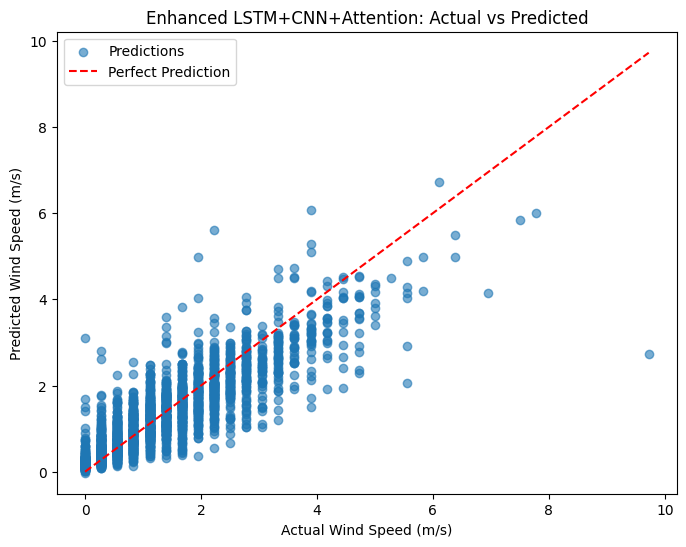

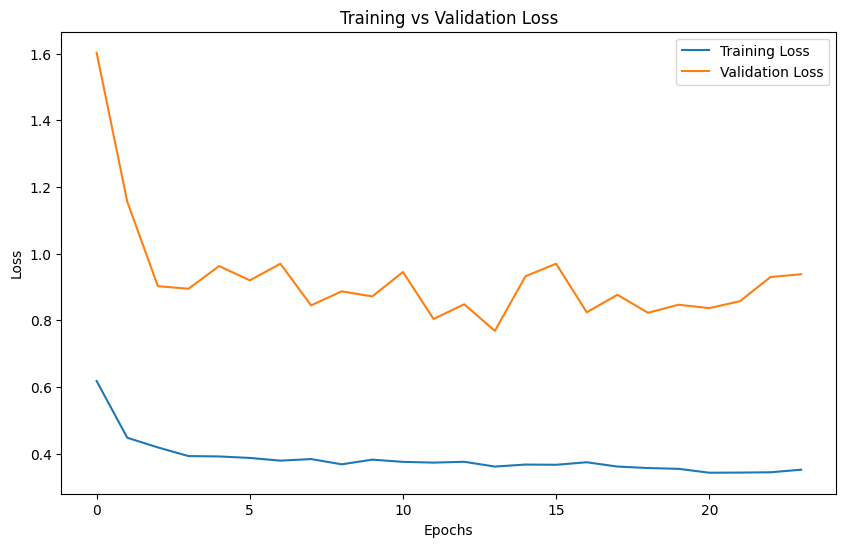

In [ ]:
from tensorflow.keras.layers import LSTM, Conv1D, Dense, Flatten, Dropout, Attention, Input, BatchNormalization
from tensorflow.keras.models import Model

# Define LSTM+CNN+Attention Model
def build_lstm_cnn_attention():
    inputs = Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
    x = LSTM(64, return_sequences=True)(inputs)
    x = BatchNormalization()(x)
    x = Conv1D(filters=32, kernel_size=1, activation='relu')(x)
    attention = Attention()([x, x])  # Add attention mechanism
    x = Flatten()(attention)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize and train the model
model_attention = build_lstm_cnn_attention()

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history_attention = model_attention.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)
# Predict on the test set
y_test_pred_attention = model_attention.predict(X_test_lstm).flatten()

# Evaluate performance
attention_metrics = evaluate_model_with_correlation(y_test, y_test_pred_attention)
print("\nEnhanced LSTM+CNN+Attention Test Metrics:")
for metric, value in attention_metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_attention, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Wind Speed (m/s)')
plt.ylabel('Predicted Wind Speed (m/s)')
plt.title('Enhanced LSTM+CNN+Attention: Actual vs Predicted')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(history_attention.history['loss'], label='Training Loss')
plt.plot(history_attention.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


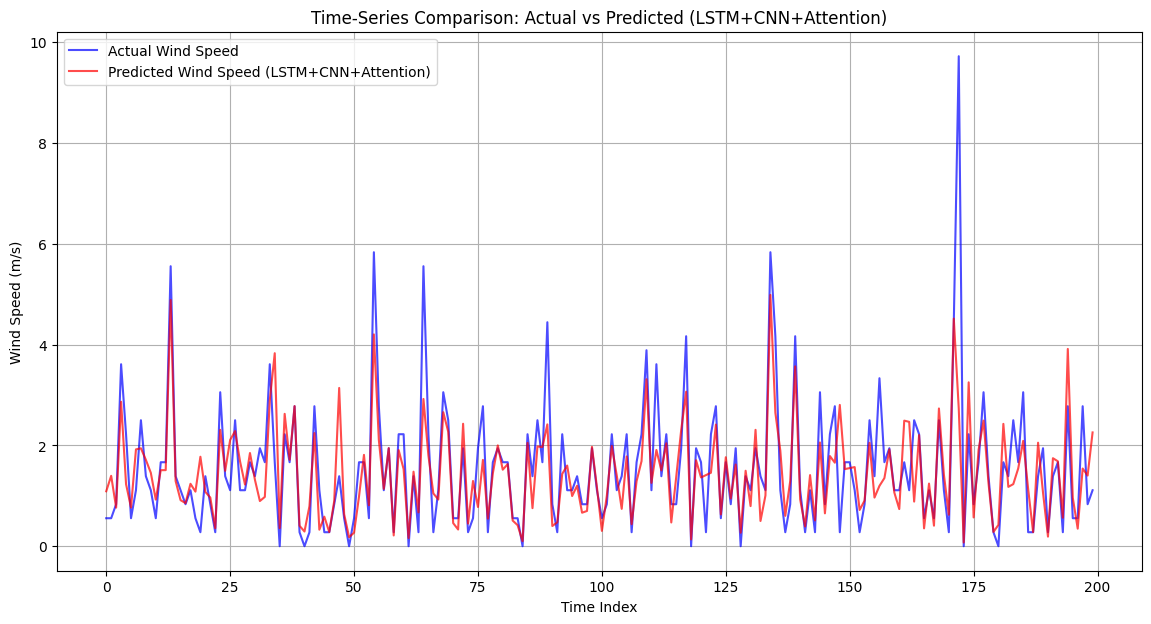

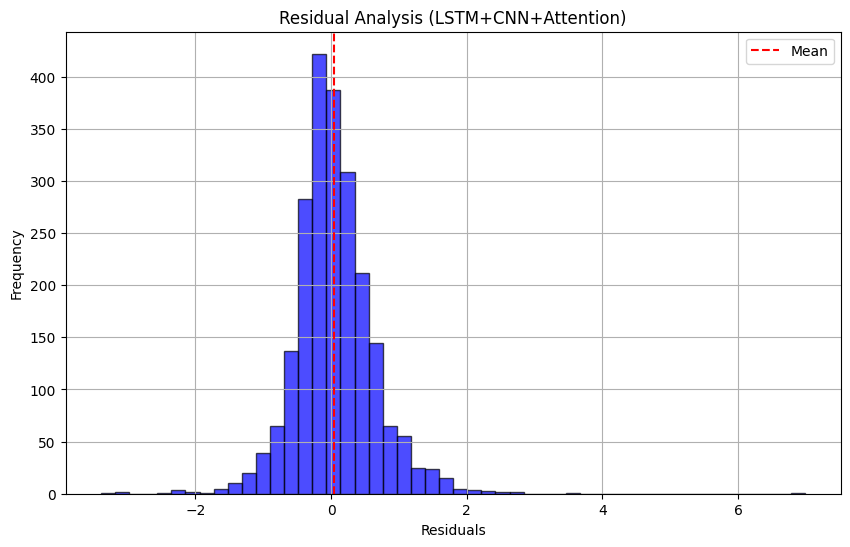

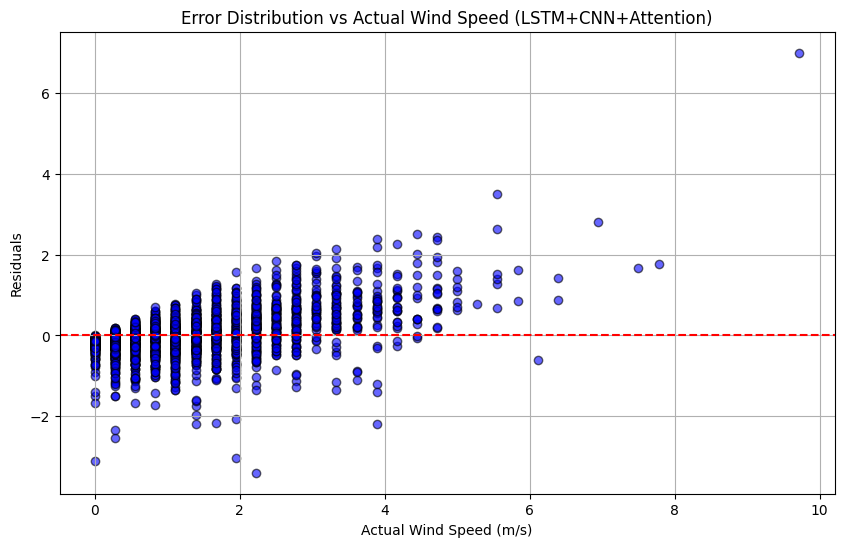

                Model      RMSE        R²  Pearson Correlation
0   Linear Regression  0.859420  0.433161             0.659471
1       Random Forest  0.839245  0.459462             0.681885
2             XGBoost  0.856371  0.437176             0.671342
3                LSTM  0.838689  0.460177             0.678475
4       Enhanced LSTM  0.826724  0.475471             0.692339
5            LSTM+CNN  0.816297  0.488618             0.699665
6  LSTM+CNN+Attention  0.603332  0.720642             0.850108


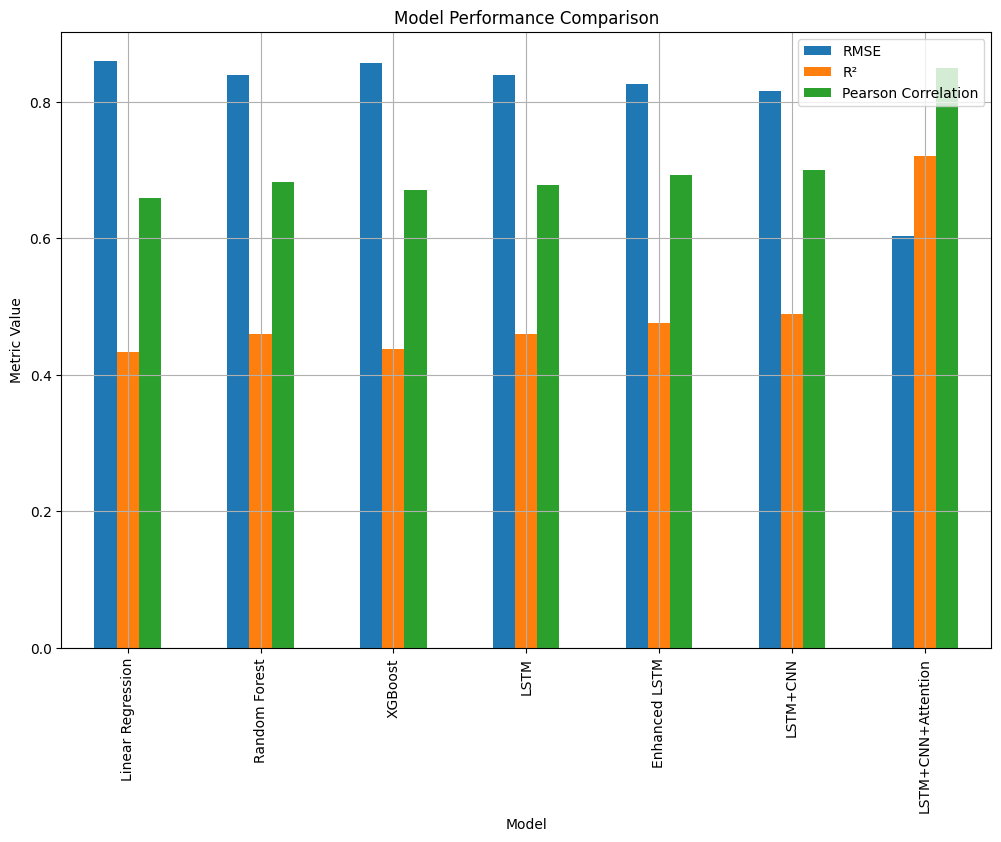

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Time-Series Plot of Actual vs Predicted for LSTM+CNN+Attention
plt.figure(figsize=(14, 7))
plt.plot(y_test.values[:200], label='Actual Wind Speed', color='blue', alpha=0.7)
plt.plot(y_test_pred_attention[:200], label='Predicted Wind Speed (LSTM+CNN+Attention)', color='red', alpha=0.7)
plt.xlabel('Time Index')
plt.ylabel('Wind Speed (m/s)')
plt.title('Time-Series Comparison: Actual vs Predicted (LSTM+CNN+Attention)')
plt.legend()
plt.grid()
plt.show()

# Residuals
residuals = y_test - y_test_pred_attention

# Residual Histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Analysis (LSTM+CNN+Attention)')
plt.legend()
plt.grid()
plt.show()

# Error Distribution vs Actual Wind Speed
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='blue', edgecolor='k')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1.5)
plt.xlabel('Actual Wind Speed (m/s)')
plt.ylabel('Residuals')
plt.title('Error Distribution vs Actual Wind Speed (LSTM+CNN+Attention)')
plt.grid()
plt.show()

# Model Comparison Table with LSTM+CNN Results
model_comparison = pd.DataFrame({
    'Model': [
        'Linear Regression', 'Random Forest', 'XGBoost',
        'LSTM', 'Enhanced LSTM', 'LSTM+CNN', 'LSTM+CNN+Attention'
    ],
    'RMSE': [
        lr_metrics['RMSE'], rf_metrics['RMSE'], xgb_metrics['RMSE'],
        lstm_metrics['RMSE'], enhanced_lstm_metrics['RMSE'], lstm_cnn_metrics['RMSE'], attention_metrics['RMSE']
    ],
    'R²': [
        lr_metrics['R²'], rf_metrics['R²'], xgb_metrics['R²'],
        lstm_metrics['R²'], enhanced_lstm_metrics['R²'], lstm_cnn_metrics['R²'], attention_metrics['R²']
    ],
    'Pearson Correlation': [
        lr_metrics['Pearson Correlation'], rf_metrics['Pearson Correlation'],
        xgb_metrics['Pearson Correlation'], lstm_metrics['Pearson Correlation'],
        enhanced_lstm_metrics['Pearson Correlation'], lstm_cnn_metrics['Pearson Correlation'],
        attention_metrics['Pearson Correlation']
    ]
})

print(model_comparison)

# Visualization of Model Performance
model_comparison.plot(x='Model', y=['RMSE', 'R²', 'Pearson Correlation'], kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.grid()
plt.show()


                Model      RMSE       MAE        R²  Pearson Correlation
0   Linear Regression  0.859420  0.628212  0.433161             0.659471
1       Random Forest  0.839245  0.614927  0.459462             0.681885
2             XGBoost  0.856371  0.622741  0.437176             0.671342
3                LSTM  0.838689  0.617077  0.460177             0.678475
4       Enhanced LSTM  0.826724  0.598962  0.475471             0.692339
5            LSTM+CNN  0.816297  0.595161  0.488618             0.699665
6  LSTM+CNN+Attention  0.603332  0.423970  0.720642             0.850108


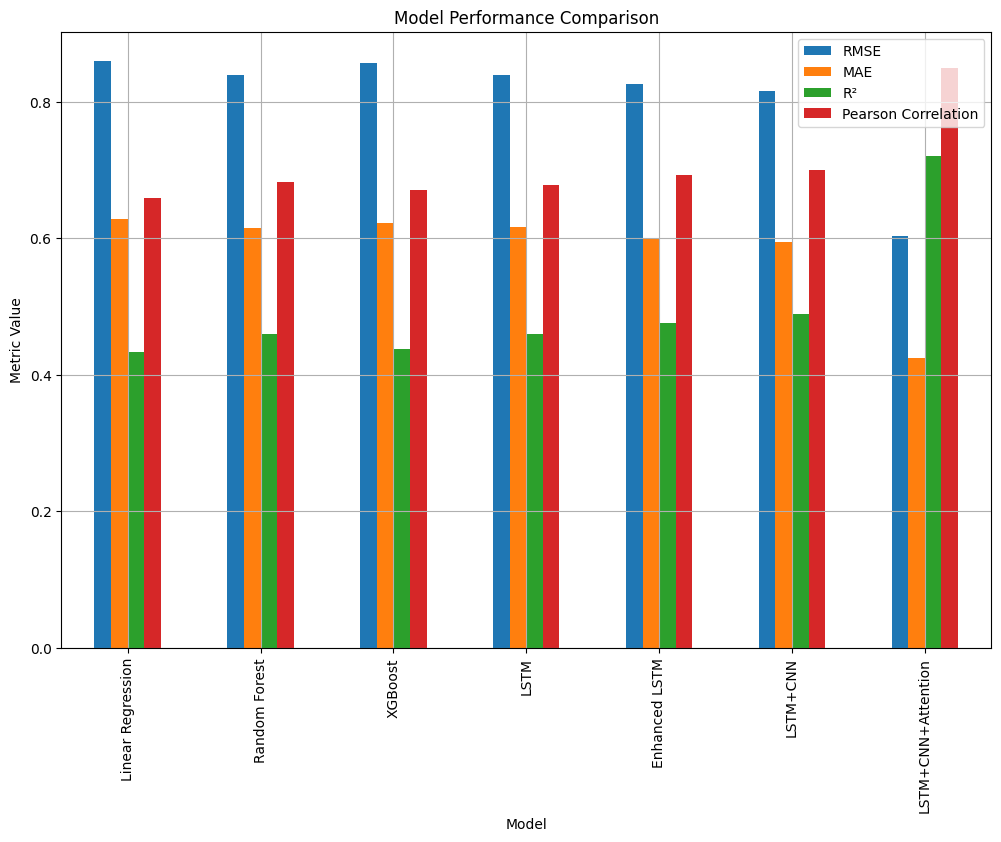

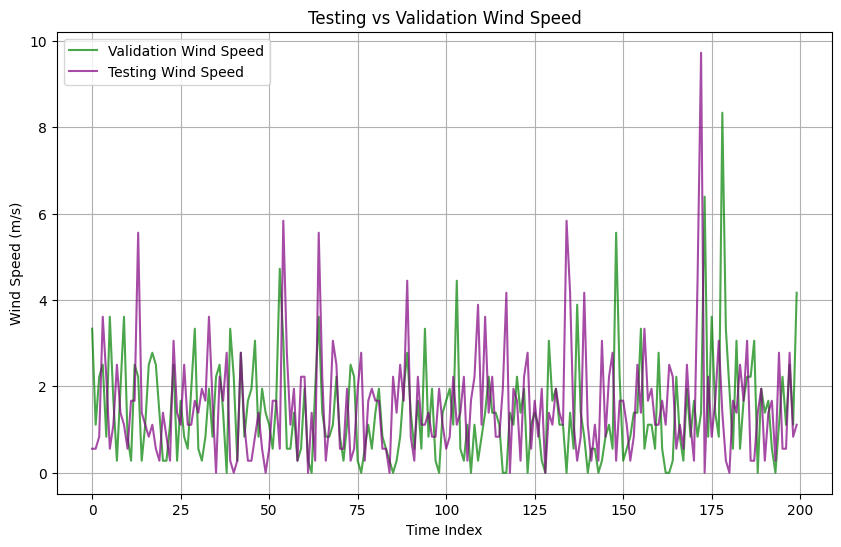

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Residuals
residuals = y_test - y_test_pred_attention


# Add MAE to Model Comparison Table
model_comparison = pd.DataFrame({
    'Model': [
        'Linear Regression', 'Random Forest', 'XGBoost',
        'LSTM', 'Enhanced LSTM', 'LSTM+CNN', 'LSTM+CNN+Attention'
    ],
    'RMSE': [
        lr_metrics['RMSE'], rf_metrics['RMSE'], xgb_metrics['RMSE'],
        lstm_metrics['RMSE'], enhanced_lstm_metrics['RMSE'], lstm_cnn_metrics['RMSE'], attention_metrics['RMSE']
    ],
    'MAE': [
        lr_metrics['MAE'], rf_metrics['MAE'], xgb_metrics['MAE'],
        lstm_metrics['MAE'], enhanced_lstm_metrics['MAE'], lstm_cnn_metrics['MAE'], attention_metrics['MAE']
    ],
    'R²': [
        lr_metrics['R²'], rf_metrics['R²'], xgb_metrics['R²'],
        lstm_metrics['R²'], enhanced_lstm_metrics['R²'], lstm_cnn_metrics['R²'], attention_metrics['R²']
    ],
    'Pearson Correlation': [
        lr_metrics['Pearson Correlation'], rf_metrics['Pearson Correlation'],
        xgb_metrics['Pearson Correlation'], lstm_metrics['Pearson Correlation'],
        enhanced_lstm_metrics['Pearson Correlation'], lstm_cnn_metrics['Pearson Correlation'],
        attention_metrics['Pearson Correlation']
    ]
})

print(model_comparison)

# Visualization of Model Performance
model_comparison.plot(x='Model', y=['RMSE', 'MAE', 'R²', 'Pearson Correlation'], kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.grid()
plt.show()



# Testing vs Validation Graph (For Comparison)
plt.figure(figsize=(10, 6))
plt.plot(y_val.values[:200], label='Validation Wind Speed', color='green', alpha=0.7)
plt.plot(y_test.values[:200], label='Testing Wind Speed', color='purple', alpha=0.7)
plt.xlabel('Time Index')
plt.ylabel('Wind Speed (m/s)')
plt.title('Testing vs Validation Wind Speed')
plt.legend()
plt.grid()
plt.show()
